In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

sns.set_context('notebook', font_scale=1.5)
sns.set_style('darkgrid')

2023-12-30 18:01:20.649676: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-30 18:01:20.649713: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-30 18:01:20.650929: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-30 18:01:20.656895: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-30 18:01:21.348810: W tensorflow/compiler/tf2

In [2]:
df = pd.read_csv('Student_Performance.csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
df.size

60000

In [6]:
df.shape

(10000, 6)

### EDA

In [7]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [8]:
df.duplicated().sum()

127

Text(0, 0.5, 'Count')

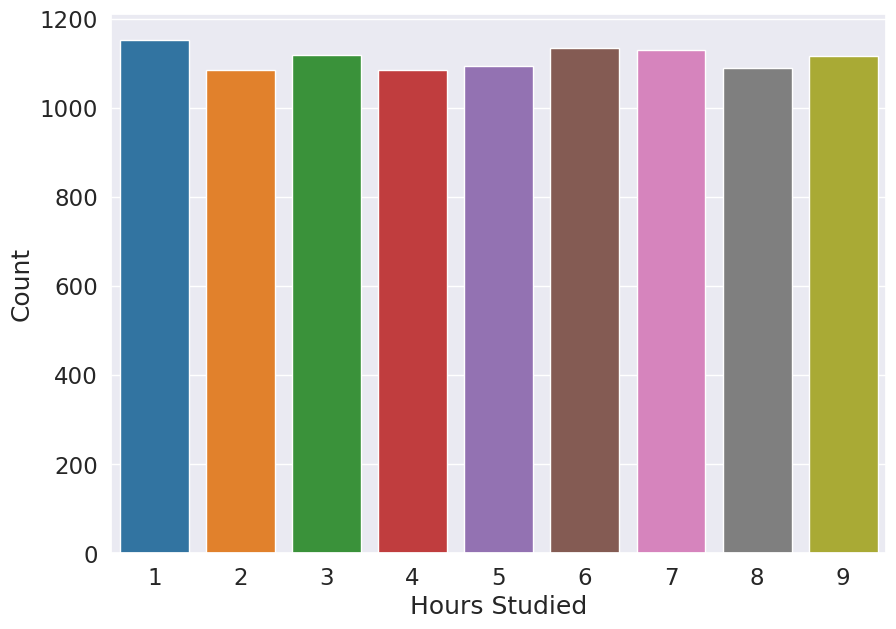

In [9]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['Hours Studied'])
plt.ylabel('Count')

Text(0, 0.5, 'Count')

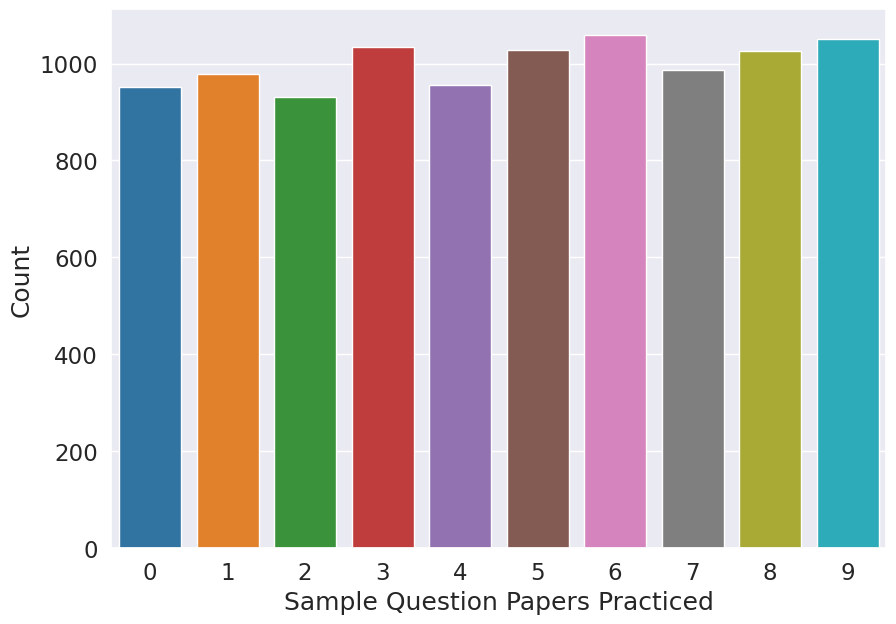

In [10]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['Sample Question Papers Practiced'])
plt.ylabel('Count')

Text(0, 0.5, 'Count')

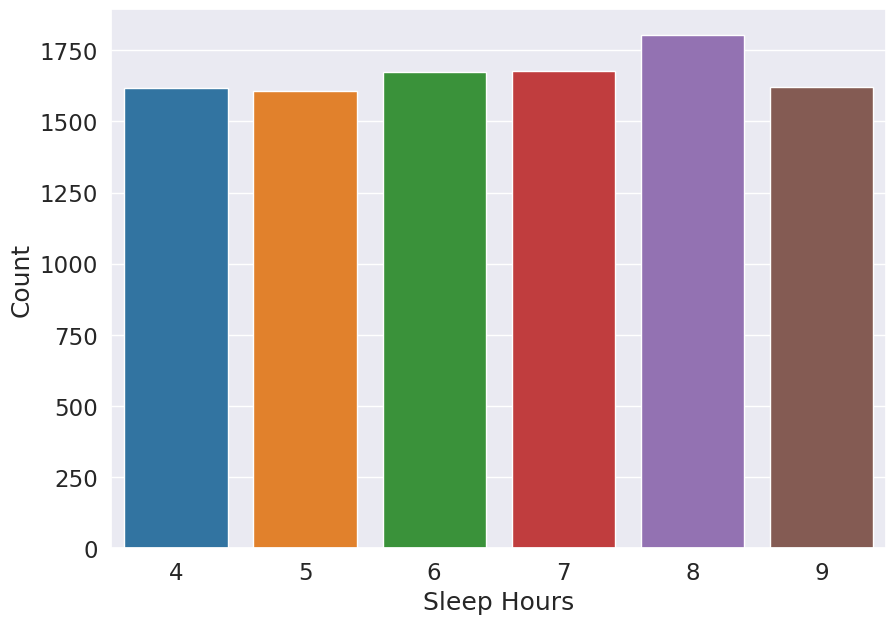

In [11]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['Sleep Hours'])
plt.ylabel('Count')

Text(0, 0.5, 'Count')

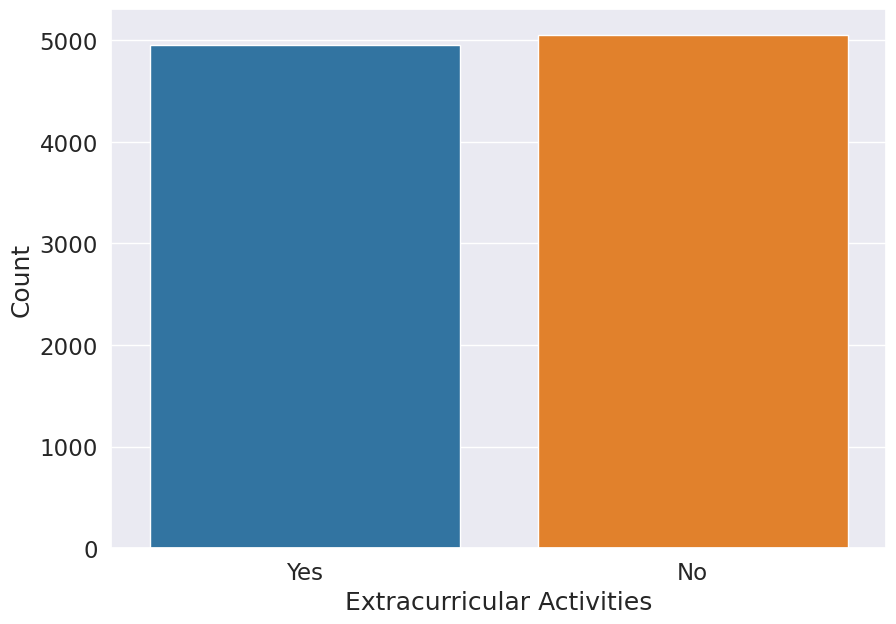

In [12]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['Extracurricular Activities'])
plt.ylabel('Count')

Text(0, 0.5, 'Count')

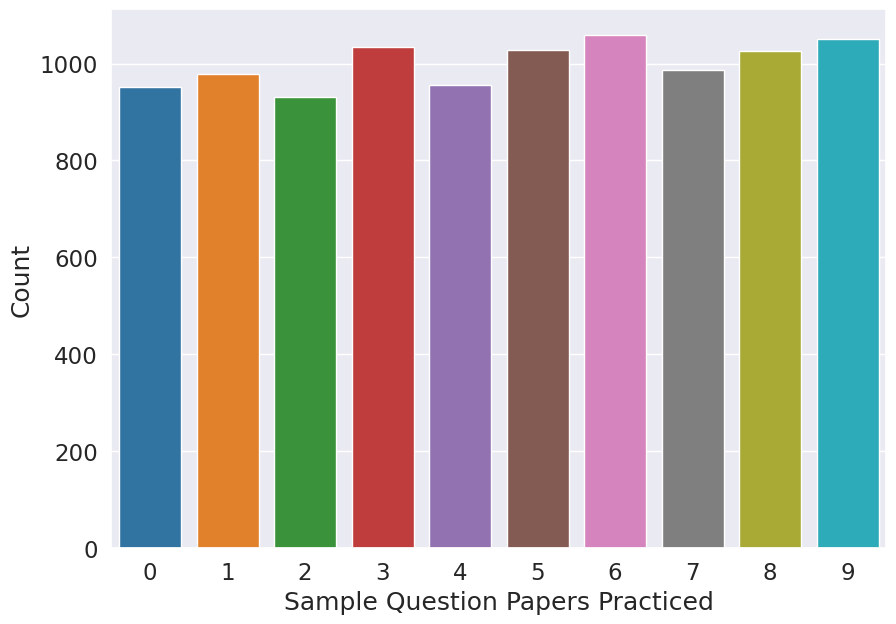

In [13]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['Sample Question Papers Practiced'])
plt.ylabel('Count')

<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

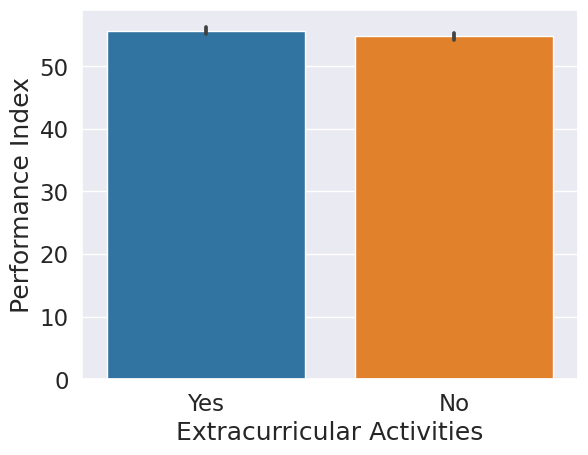

In [14]:
sns.barplot(x=df['Extracurricular Activities'], y=df['Performance Index'])

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

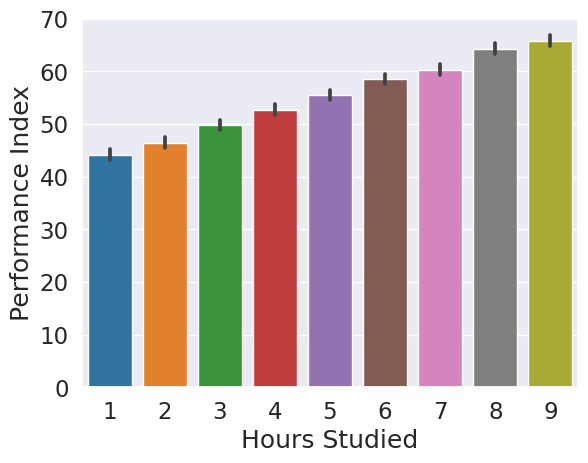

In [15]:
sns.barplot(x=df['Hours Studied'], y=df['Performance Index'])

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

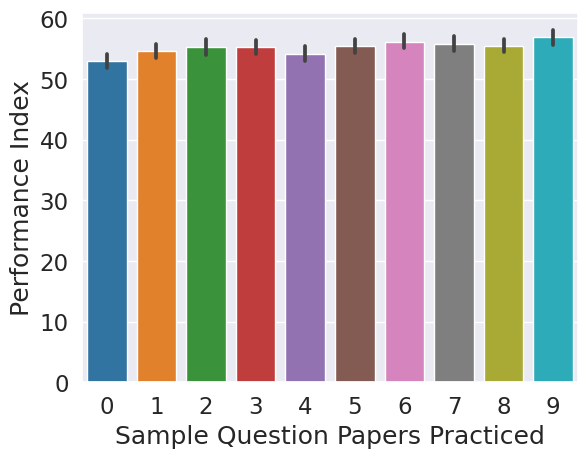

In [16]:
sns.barplot(x=df['Sample Question Papers Practiced'], y=df['Performance Index'])

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

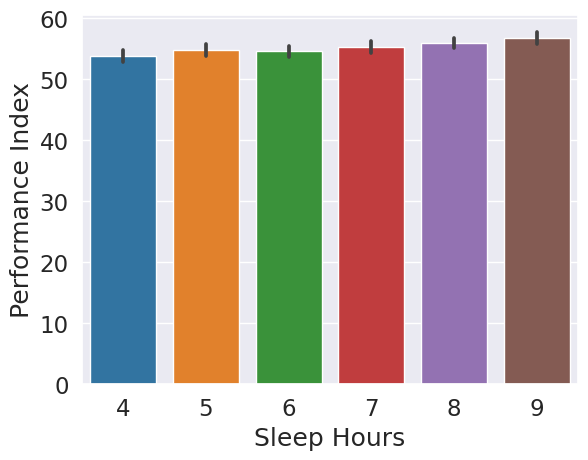

In [17]:
sns.barplot(x=df['Sleep Hours'], y=df['Performance Index'])

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

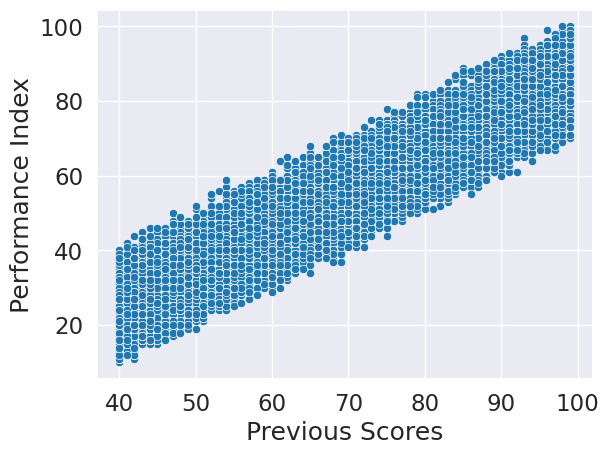

In [18]:
sns.scatterplot(x=df['Previous Scores'], y=df['Performance Index'])

Text(0.5, 1.0, 'Previous Scores, Hours Studied and Performance Index')

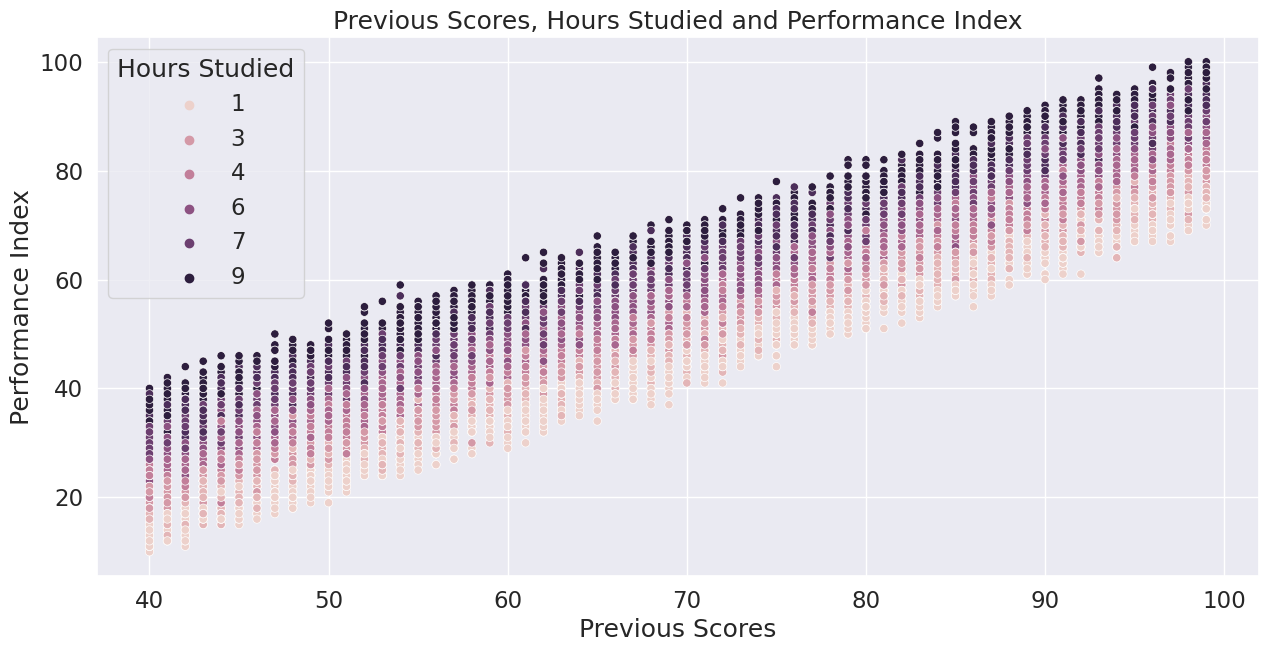

In [19]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=df['Previous Scores'], y=df['Performance Index'], hue=df['Hours Studied'])
plt.title('Previous Scores, Hours Studied and Performance Index')

### Model Build

In [20]:
df = pd.get_dummies(data=df, columns=['Extracurricular Activities'], dtype=int)

In [21]:
df = (df - df.mean()) / df.std()

In [23]:
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']

X_train = X.sample(frac=.7, random_state=0)
X_test = X.drop(X_train.index)
y_train = y.sample(frac=.7, random_state=0)
y_test = y.drop(y_train.index)

In [66]:
def linear_regression():
    inputs = tf.keras.Input(shape=[X_train.shape[1]])
    
    x = tf.keras.layers.Dense(128, activation='relu')(inputs)
    
    x = tf.keras.layers.Dropout(.075)(x)
    
    x = tf.keras.layers.Dense(64, activation='relu')(x)
  
    outputs = tf.keras.layers.Dense(1)(x)
    
    return tf.keras.Model(inputs, outputs)

In [67]:
model = linear_regression()

In [68]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=['mse'],
                  metrics=['mae']
                 )

In [69]:
history = model.fit(X_train, y_train, epochs=100, validation_split=.2)

Epoch 1/100
175/175 [==============================] - 1s 3ms/step - loss: 0.0933 - mae: 0.1883 - val_loss: 0.0146 - val_mae: 0.0967
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 0.0209 - mae: 0.1146 - val_loss: 0.0129 - val_mae: 0.0905
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 0.0193 - mae: 0.1098 - val_loss: 0.0132 - val_mae: 0.0921
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 0.0178 - mae: 0.1060 - val_loss: 0.0132 - val_mae: 0.0918
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 0.0171 - mae: 0.1040 - val_loss: 0.0136 - val_mae: 0.0929
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 0.0166 - mae: 0.1018 - val_loss: 0.0125 - val_mae: 0.0894
Epoch 7/100
175/175 [==============================] - 0s 2ms/step - loss: 0.0160 - mae: 0.1009 - val_loss: 0.0124 - val_mae: 0.0890
Epoch 8/100
175/175 [==============================] - 0s 2ms/step - 

175/175 [==============================] - 0s 2ms/step - loss: 0.0121 - mae: 0.0876 - val_loss: 0.0139 - val_mae: 0.0951
Epoch 63/100
175/175 [==============================] - 0s 2ms/step - loss: 0.0118 - mae: 0.0858 - val_loss: 0.0134 - val_mae: 0.0927
Epoch 64/100
175/175 [==============================] - 0s 2ms/step - loss: 0.0120 - mae: 0.0869 - val_loss: 0.0126 - val_mae: 0.0896
Epoch 65/100
175/175 [==============================] - 0s 2ms/step - loss: 0.0121 - mae: 0.0875 - val_loss: 0.0128 - val_mae: 0.0906
Epoch 66/100
175/175 [==============================] - 0s 2ms/step - loss: 0.0121 - mae: 0.0873 - val_loss: 0.0126 - val_mae: 0.0898
Epoch 67/100
175/175 [==============================] - 0s 2ms/step - loss: 0.0119 - mae: 0.0866 - val_loss: 0.0123 - val_mae: 0.0894
Epoch 68/100
175/175 [==============================] - 0s 2ms/step - loss: 0.0120 - mae: 0.0868 - val_loss: 0.0129 - val_mae: 0.0914
Epoch 69/100
175/175 [==============================] - 0s 2ms/step - loss:

In [37]:
def plot_loss_curves(history):
    """
    Plots the curves of both loss and accuracy
    """

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    mae = history.history['mae']
    val_mae = history.history['val_mae']
    
    epochs = range(len(loss))

    fig, ax = plt.subplots(1, 2, figsize = (20, 7))

    # Plotting loss
    ax1 = sns.lineplot(x = epochs, y = loss, label='Training Loss', ax= ax[0])
    ax1 = sns.lineplot(x = epochs, y = val_loss, label='Validation Loss', ax= ax[0])
    ax1.set(title = 'Loss', xlabel = 'Epochs')

    # Plot accuracy
    ax2 = sns.lineplot(x = epochs, y = mae, label='Training Mean Absolute Error', ax= ax[1])
    ax2 = sns.lineplot(x = epochs, y = val_mae, label='Validation Mean Absolute Error', ax=ax[1])
    ax2.set(title = 'Mean Absolute Error', xlabel = 'Epochs')

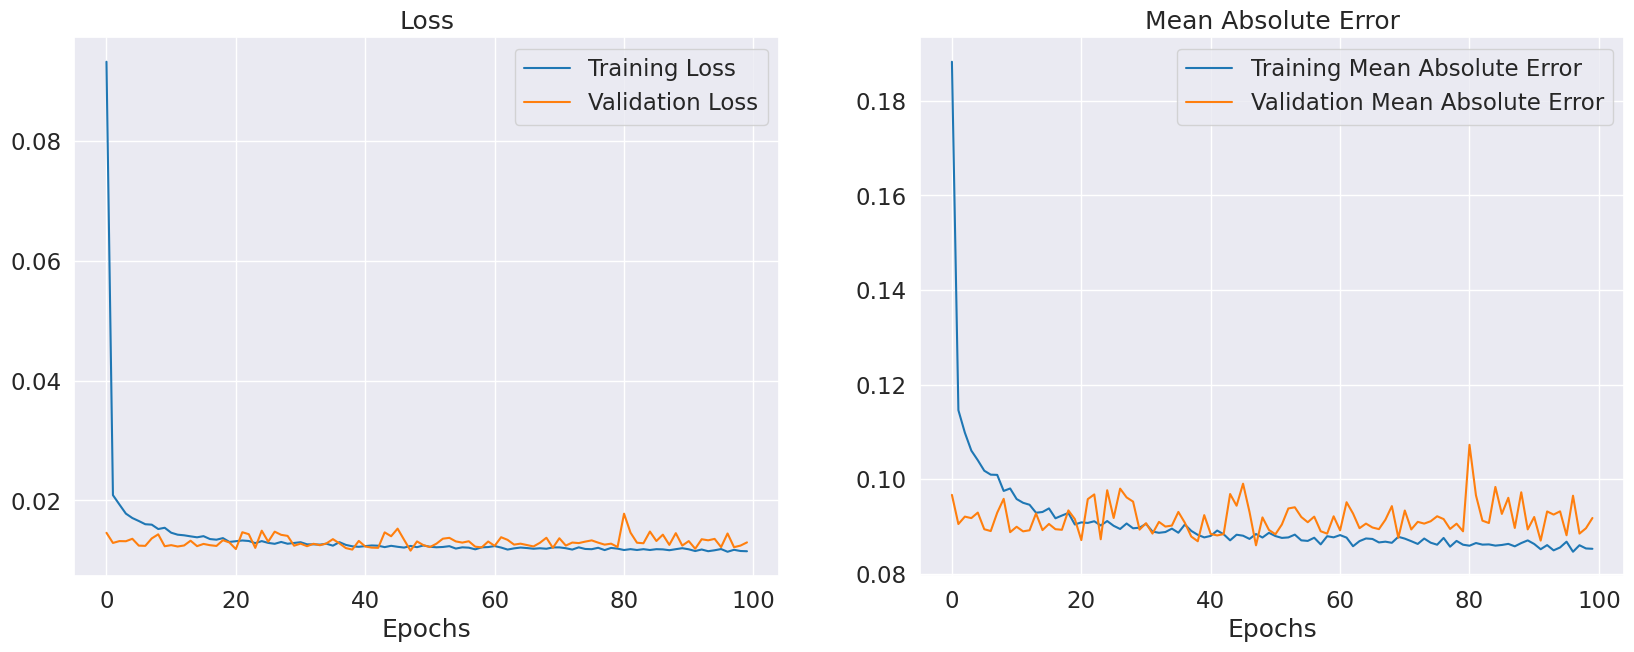

In [70]:
plot_loss_curves(history)

In [71]:
model.evaluate(X_test, y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.0133 - mae: 0.0921


[0.013343943282961845, 0.09212347120046616]